<a href="https://colab.research.google.com/github/rahulrajpr/AdvancedFeatureEngineering/blob/Encoding/WoeEncoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
path = '/content/drive/MyDrive/Udemy Courses - 2.0/Feature Engineering/Dataset/titanic.csv'
data = pd.read_csv(path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
use_cols=['Sex', 'Embarked', 'Cabin', 'Survived']

In [28]:
data = data[use_cols]

In [29]:
data['Cabin'] = data['Cabin'].str[0]

In [30]:
data.isnull().sum()

Sex           0
Embarked      2
Cabin       687
Survived      0
dtype: int64

In [31]:
for col in data.columns:
  data[col].fillna(data[col].mode()[0], inplace = True)

In [32]:
data.isnull().sum()

Sex         0
Embarked    0
Cabin       0
Survived    0
dtype: int64

In [33]:
data.groupby('Cabin')['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.323056
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
Name: Survived, dtype: float64

In [34]:
data = data[~(data['Cabin'] == 'T')]

In [35]:
X = data.drop('Survived', axis =1)
y = data['Survived']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 100)

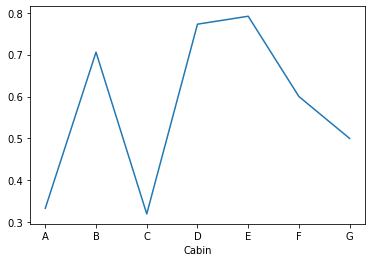

In [38]:
pd.concat([X_train,y_train], axis = 1).groupby('Cabin')['Survived'].mean().plot()
plt.show()

In [39]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
from feature_engine.encoding import WoEEncoder

In [41]:
woe_enc = WoEEncoder()

In [42]:
woe_enc.fit(X_train,y_train)

WoEEncoder()

In [43]:
woe_enc.encoder_dict_

{'Sex': {'female': 1.4560276991345658, 'male': -0.9296723005699866},
 'Embarked': {'C': 0.6334890395110935,
  'Q': -0.0017709969890059593,
  'S': -0.16034627085629044},
 'Cabin': {'A': -0.20536995223024557,
  'B': 1.3632459656835998,
  'C': -0.26634674872896097,
  'D': 1.7115526599518154,
  'E': 1.82277829506204,
  'F': 0.8932423364378639,
  'G': 0.4877772283296996}}

In [44]:
woe_enc.transform(X_train)

,Sex,Embarked,Cabin
85,1.456028,-0.160346,-0.266347
794,-0.929672,-0.160346,-0.266347
161,1.456028,-0.160346,-0.266347
761,-0.929672,-0.160346,-0.266347
409,1.456028,-0.160346,-0.266347
...,...,...,...
856,1.456028,-0.160346,-0.266347
872,-0.929672,-0.160346,1.363246
836,-0.929672,-0.160346,-0.266347
793,-0.929672,0.633489,-0.266347


In [45]:
X_train = woe_enc.transform(X_train)
X_test = woe_enc.transform(X_test)

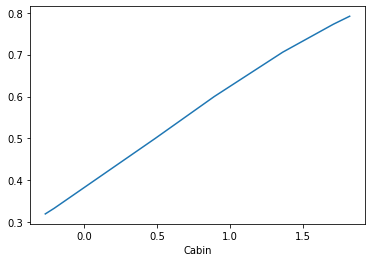

In [46]:
pd.concat([X_train,y_train], axis = 1).groupby('Cabin')['Survived'].mean().plot()
plt.show()